# Training model
1. install requirements

In [1]:
%pip install -qr requirements.txt comet_ml  # install

Note: you may need to restart the kernel to use updated packages.


2. import lib

In [2]:
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 2023-9-2 Python-3.9.17 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3080, 10240MiB)


Setup complete ✅ (20 CPUs, 15.6 GB RAM, 108.0/1006.9 GB disk)


3. validate models on dataset

In [ ]:
# Validate YOLOv5s on COCO val
!python val.py --weights yolov5s.pt --data coco.yaml --img 640 --half

4. train

In [3]:
#@title Select YOLOv5 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'ClearML', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 10 --epochs 100 --data VisDrone.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=VisDrone.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=10, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2023-9-2 Python-3.9.17 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3080, 10240MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_ga

![train model.JPG](<attachment:train model.JPG>)
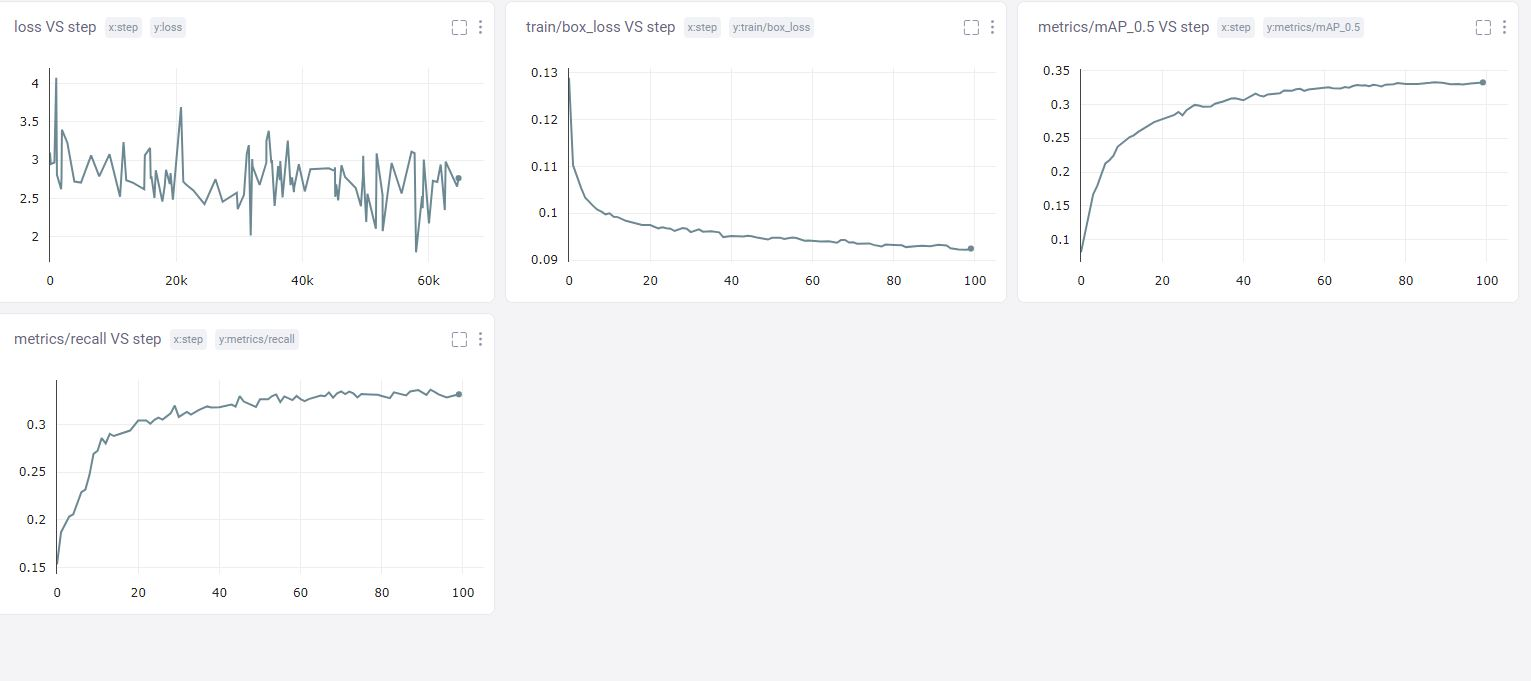

5. testing model on dataset VisDrone

In [5]:
# Validate YOLOv5s on COCO val
!python val.py --weights runs/train/exp/weights/best.pt --data VisDrone.yaml --task test --name first_test

val: data=/home/dylan/projet/drone/Drone_Surveillance/Module_IA/yolov5/data/VisDrone.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=first_test, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 2023-9-2 Python-3.9.17 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3080, 10240MiB)

Fusing layers... 
Model summary: 157 layers, 7037095 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /home/dylan/projet/drone/Drone_Surveillance/Module_IA/datasets/Vi
test: New cache created: /home/dylan/projet/drone/Drone_Surveillance/Module_IA/datasets/VisDrone/VisDrone2019-DET-test-dev/labels.cache
                 Class     Images  Instances          P          R      mAP50   WARNING ⚠️ NMS time limit 2.100s exceeded
                 Class     Images  Instances     

<img src="runs/val/first_test/val_batch1_pred.jpg" />

In [15]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source 'https://www.youtube.com/watch?v=uCDyDnUtljM'

detect: weights=['runs/train/exp/weights/best.pt'], source=https://www.youtube.com/watch?v=uCDyDnUtljM, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2023-9-2 Python-3.9.17 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3080, 10240MiB)

Fusing layers... 
Model summary: 157 layers, 7037095 parameters, 0 gradients, 15.8 GFLOPs
requirements: Ultralytics requirements ['pafy', 'youtube_dl==2020.12.2'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.7 MB/s eta 0:00:00a 0:00:01

requirements: AutoUpdate success ✅ 2.7s, installed 2 packages: ['pafy', 'youtube_dl==2020.12.2']
requirements: ⚠️ Resta

<img src="runs/detect/exp3/image_1.jpg" />
<img src="runs/detect/exp4/image_2.jpg" />
<img src="runs/detect/exp5/image_3.jpg" />
<img src="runs/detect/exp6/image_4.jpg" />

